<a href="https://colab.research.google.com/github/Mohammed-Abdul-Rafe-Sajid/ML-LAB/blob/main/Naive_RF%2CDBSCAN%2Cagglomerative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAIVE BAYES

First 5 rows of dataset:
   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

Model Evaluation Metrics:
Accuracy:  0.7344
Precision: 0.6184
Recall:    0.6812
F1 Score:  0.6483

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       123
           1       0.62      0.68      0.65        69

    accuracy                           0.73       192
   macro avg       0.71      0.72      0.72       192
weighted avg       0.74      0.73      0.74       192



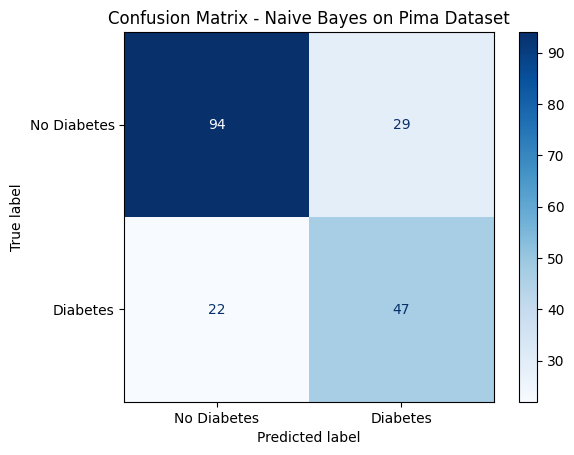

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt



df = pd.read_csv("/content/drive/MyDrive/CBIT/ML/FeatureEngg-Datasets/pima-indians-diabetes.csv")
df.head()
# Display first few rows
print("First 5 rows of dataset:")
print(df.head())

# Separate features (X) and target (y)
X = df.drop("class", axis=1)
y = df["class"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Standardize features (important for numerical stability)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes on Pima Dataset")
plt.show()


# Decision Tree on heart Disease dataset

In [ ]:
df=pd.read_csv("/content/heart.csv")

Training Accuracy: 0.9031
Testing Accuracy : 0.7763

Model Evaluation Metrics:
Accuracy:  0.7763
Precision: 0.8333
Recall:    0.7317
F1 Score:  0.7792

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        35
           1       0.83      0.73      0.78        41

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.78      0.78      0.78        76



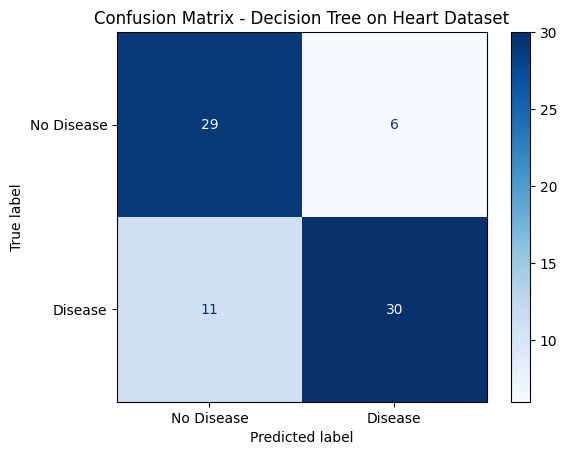

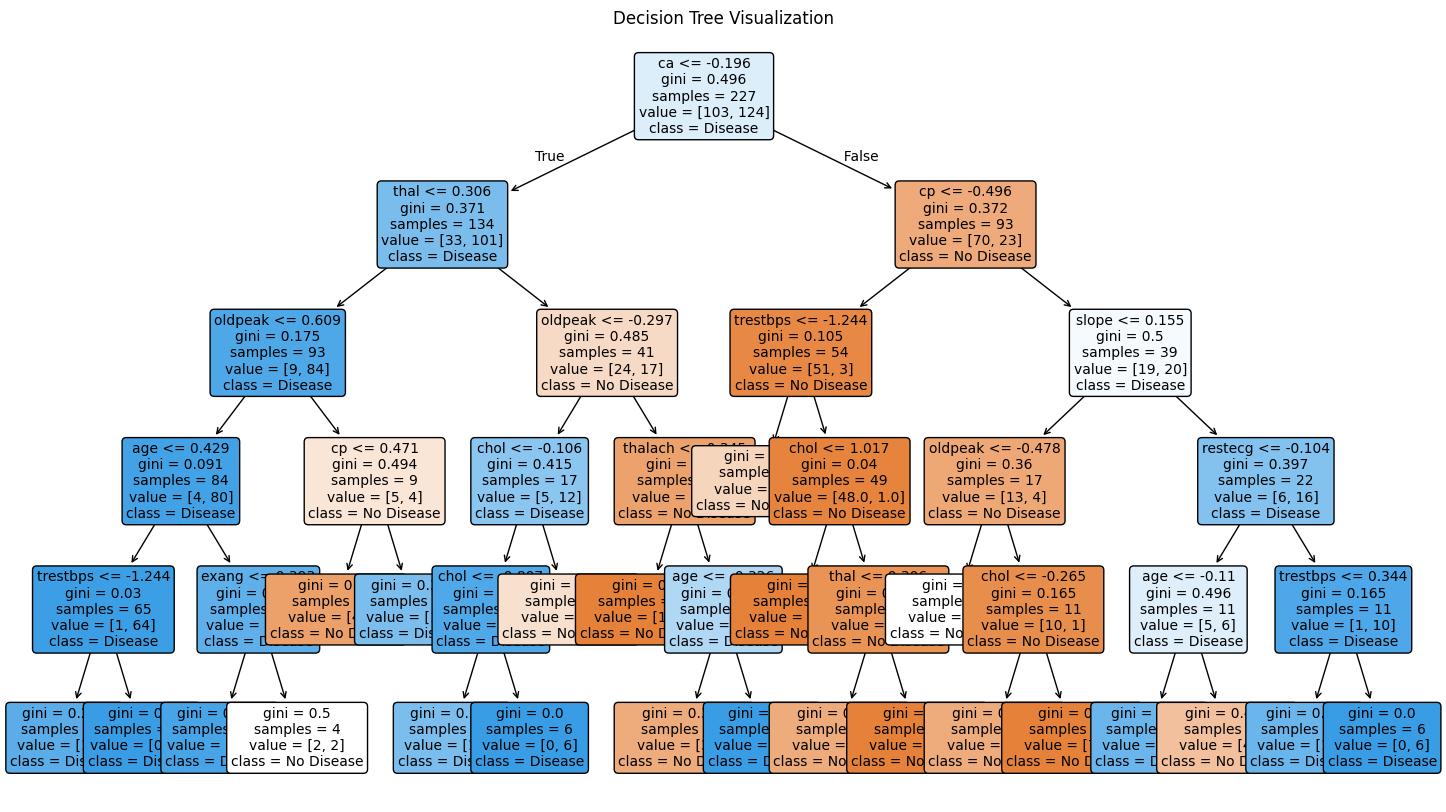

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# ----------------------------
# 2️⃣ Separate features and target
# ----------------------------
X = df.drop("target", axis=1)
y = df["target"]

# ----------------------------
# 3️⃣ Split into train and test sets
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ----------------------------
# 4️⃣ Feature scaling (optional but helpful for visualization)
# ----------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----------------------------
# 5️⃣ Initialize and train Decision Tree
# ----------------------------
# You can tune parameters like max_depth, min_samples_leaf
clf = DecisionTreeClassifier(
    criterion="gini",          # or 'entropy'
    max_depth=5,               # limit depth to avoid overfitting
    min_samples_leaf=5,
    min_samples_split=5, # minimum samples required at each leaf node
    random_state=42
)

clf.fit(X_train, y_train)

# ✅ Training and Testing Accuracy
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy : {test_acc:.4f}")
# ----------------------------
# 6️⃣ Predictions and Evaluation
# ----------------------------
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ----------------------------
# 7️⃣ Confusion Matrix
# ----------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree on Heart Dataset")
plt.show()

# ----------------------------
# 8️⃣ Visualize the Decision Tree
# ----------------------------
plt.figure(figsize=(18, 10))
plot_tree(
    clf,
    filled=True,
    feature_names=df.columns[:-1],
    class_names=["No Disease", "Disease"],
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


#RANDOM FOREST ON HEART DATASET

First 5 rows of dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Training Accuracy: 0.9119
Testing Accuracy:  0.8421

Model Evaluation Metrics:
Accuracy:  0.8421
Precision: 0.8222
Recall:    0.9024
F1 Score:  0.8605

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.82      0.90      0.86        41

    accuracy     

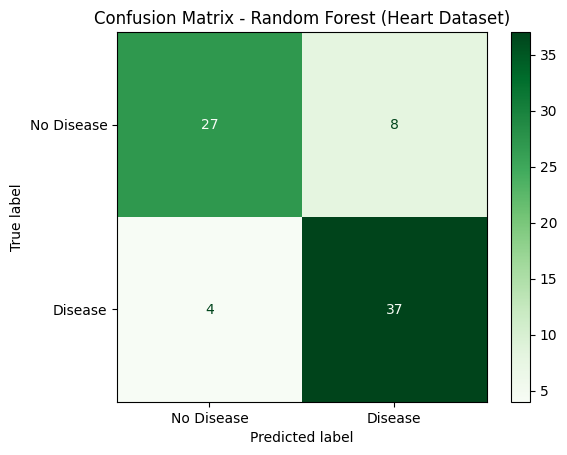

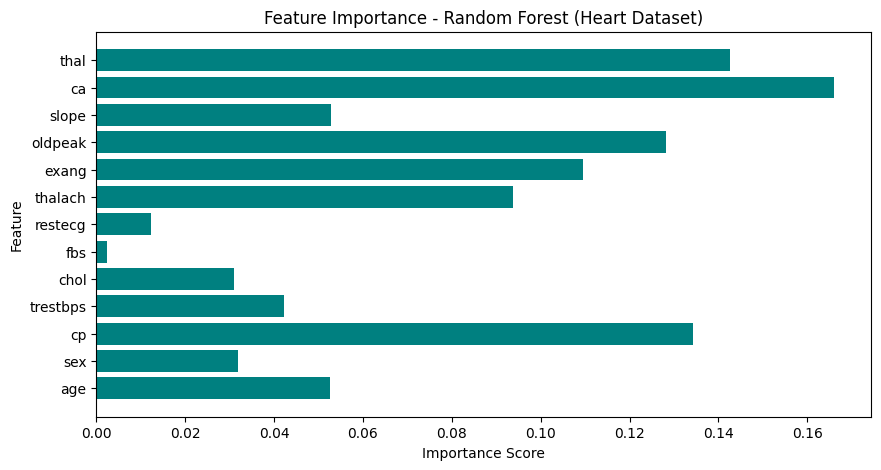

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

df=pd.read_csv("/content/heart.csv")

print("First 5 rows of dataset:")
print(df.head())

# ----------------------------
# 2️⃣ Split features and target
# ----------------------------
X = df.drop("target", axis=1)
y = df["target"]

# ----------------------------
# 3️⃣ Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ----------------------------
# 4️⃣ Feature Scaling (optional)
# ----------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----------------------------
# 5️⃣ Train Random Forest
# ----------------------------
# You can tune hyperparameters like n_estimators, max_depth, min_samples_leaf
rf = RandomForestClassifier(
    n_estimators=100,     # number of trees
    max_depth=5,          # limit tree depth to avoid overfitting
    min_samples_leaf=5,
    min_samples_split=5 ,# min samples per leaf
    random_state=42
)
rf.fit(X_train, y_train)
# ✅ Check training accuracy
y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# ✅ Check test accuracy
y_test_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")
# ----------------------------
# 6️⃣ Predictions and Evaluation
# ----------------------------
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ----------------------------
# 7️⃣ Confusion Matrix
# ----------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - Random Forest (Heart Dataset)")
plt.show()

# ----------------------------
# 8️⃣ Feature Importance Plot
# ----------------------------
importances = rf.feature_importances_
feature_names = df.columns[:-1]

plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances, color='teal')
plt.title("Feature Importance - Random Forest (Heart Dataset)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [ ]:
# ==== LINEAR SVM PIPELINE ====
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset (replace with your path if needed)
df = pd.read_csv("/content/drive/MyDrive/CBIT/ML/FeatureEngg-Datasets/pima-indians-diabetes.csv")
df.head()

# Split features and target
X = df.drop("class", axis=1)
y = df["class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Linear SVM
svm_linear = SVC(kernel='linear', C=1, random_state=42)
svm_linear.fit(X_train, y_train)

# Predict and evaluate
y_pred_linear = svm_linear.predict(X_test)

print("🔹 Linear SVM Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))


🔹 Linear SVM Results 🔹
Accuracy: 0.7597402597402597

Confusion Matrix:
 [[81 18]
 [19 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [ ]:
# ==== NON-LINEAR (RBF) SVM PIPELINE ====
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

print("🔹 Non-linear (RBF) SVM Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))


🔹 Non-linear (RBF) SVM Results 🔹
Accuracy: 0.7337662337662337

Confusion Matrix:
 [[82 17]
 [24 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



#    K MEANS Clustering

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("/content/drive/MyDrive/CBIT/ML/Mall_customers (1).csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


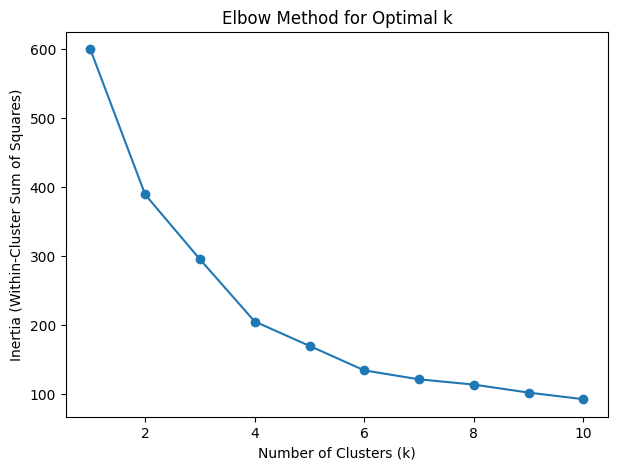

Cluster centers (in scaled feature space):
[[ 1.17882975 -0.49388609 -0.32971553]
 [-0.42880597  0.97484722  1.21608539]
 [-0.93876351 -1.31473131  0.95680216]
 [-0.86957306 -0.23851652 -0.36060916]
 [ 0.39737911  1.11508909 -1.23126963]]


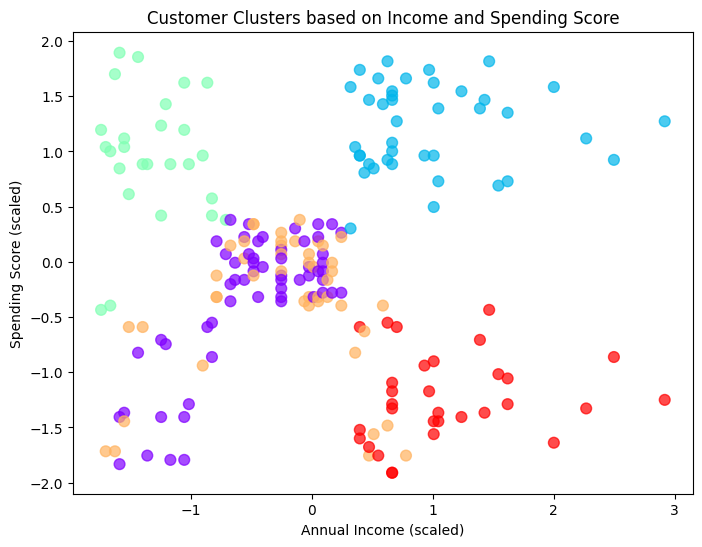


Cluster-wise summary:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871
[2 3 0 1 4]


In [4]:
# K-Means Clustering on Mall Customers Dataset

# ----------------------------
# 1️⃣ Import required libraries
# ----------------------------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler


df=pd.read_csv("/content/drive/MyDrive/CBIT/ML/Mall_customers (1).csv")


# ----------------------------
# 3️⃣ Preprocess data
# ----------------------------
# Encode Gender (Male=0, Female=1)
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

# Select features for clustering
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Optional: scale data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------
# 4️⃣ Find optimal number of clusters (Elbow Method)
# ----------------------------
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K, inertia, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.show()

# ----------------------------
# 5️⃣ Train final K-Means model (choose best k, say 5)
# ----------------------------
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print("Cluster centers (in scaled feature space):")
print(kmeans.cluster_centers_)

# ----------------------------
# 6️⃣ Visualize clusters (2D)
# ----------------------------
plt.figure(figsize=(8, 6))
plt.scatter(
    X_scaled[:, 1], X_scaled[:, 2],
    c=df["Cluster"], cmap="rainbow", s=60, alpha=0.7
)
plt.title("Customer Clusters based on Income and Spending Score")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

# ----------------------------
# 7️⃣ Analyze cluster properties
# ----------------------------
cluster_summary = df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
print("\nCluster-wise summary:")
print(cluster_summary)
print(df['Cluster'].unique())

# DBSCAN Clustering

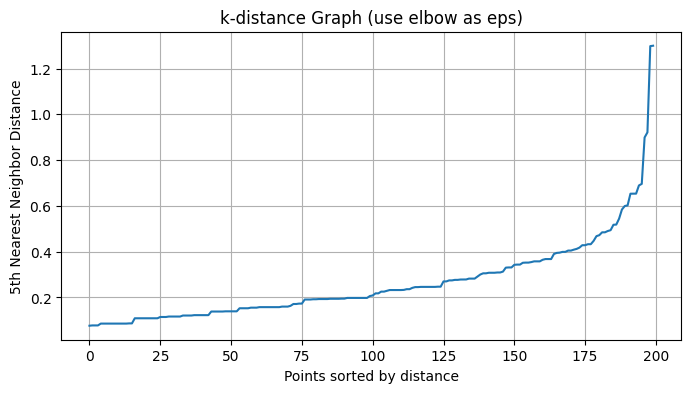

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_scaled is your preprocessed feature data
neigh = NearestNeighbors(n_neighbors=5)  # '5' = min_samples (common choice)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Sort and plot distances of the k-th nearest neighbor
distances = np.sort(distances[:, 4])  # index 4 → 5th neighbor (0-based)
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("k-distance Graph (use elbow as eps)")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.grid(True)
plt.show()


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Cluster labels count:
Cluster
 0    157
 1     34
-1      9
Name: count, dtype: int64


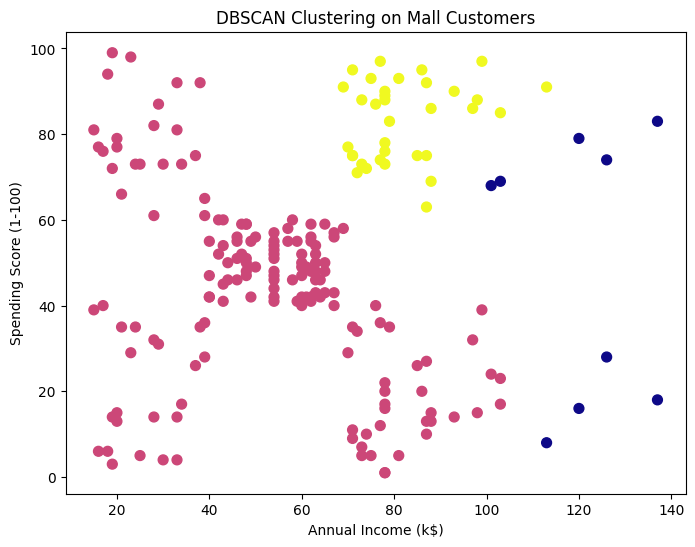


Number of noise points: 9


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Step 1: Load dataset
df=pd.read_csv("/content/drive/MyDrive/CBIT/ML/Mall_customers (1).csv")

# Display first few rows
print(df.head())

# Step 2: Select features for clustering (Annual Income & Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Scale the data (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply DBSCAN
# eps = neighborhood radius, min_samples = minimum points to form a dense region
dbscan = DBSCAN(eps=0.45, min_samples=4)
df['Cluster'] =  dbscan.fit_predict(X_scaled)

# Step 6: Show cluster distribution
print("\nCluster labels count:")
print(df['Cluster'].value_counts())

# Step 7: Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
            c=df['Cluster'], cmap='plasma', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering on Mall Customers')
plt.show()

# Step 8: Identify noise points
noise_points = df[df['Cluster'] == -1]
print(f"\nNumber of noise points: {len(noise_points)}")


# Optional: Tune parameters to improve clustering
# Example: dbscan = DBSCAN(eps=0.7, min_samples=4)


# agglomerative clustering

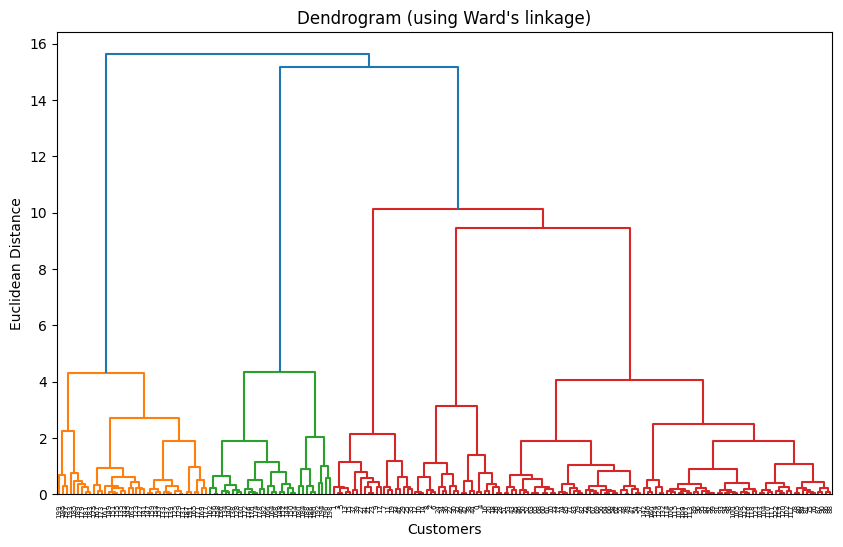

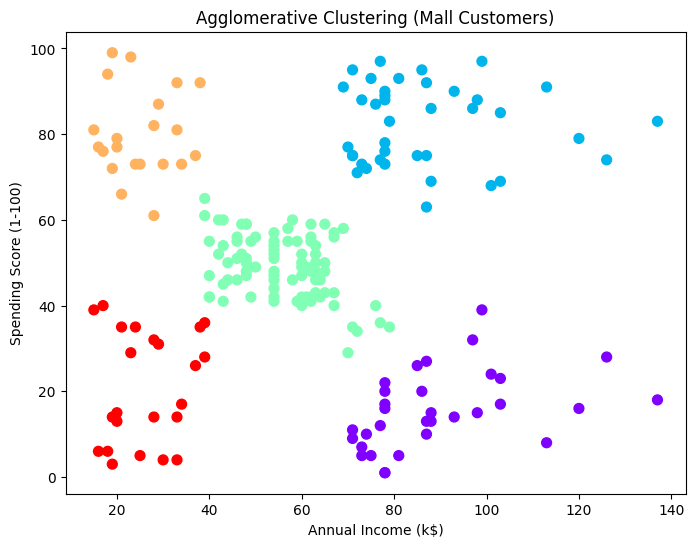

Cluster
2    85
1    39
0    32
4    23
3    21
Name: count, dtype: int64


In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
df=pd.read_csv("/content/drive/MyDrive/CBIT/ML/Mall_customers (1).csv")


# Step 2: Select features (Annual Income & Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Feature scaling (important for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Plot Dendrogram to find optimal number of clusters
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram (using Ward's linkage)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

# Step 5: Apply Agglomerative Clustering
# You can choose number of clusters from dendrogram (e.g., 5)
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_scaled)

# Step 6: Add cluster labels to dataset
df['Cluster'] = y_hc

# Step 7: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
            c=df['Cluster'], cmap='rainbow', s=50)
plt.title("Agglomerative Clustering (Mall Customers)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

# Step 8: Check cluster distribution
print(df['Cluster'].value_counts())
